https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slp - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. caa - number of major vessels (0-3) colored by flourosopy

13. thall - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. output - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [155]:
# import ipdb
# pip install torch
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

print('Libraries are Loaded')

import math
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score
from statsmodels.stats.proportion import proportions_ztest
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

print('Packages imported...')

Libraries are Loaded
Packages imported...


In [2]:
df = pd.read_csv('/Users/edith/Desktop/Polyu/4433/Individual Project/archive/heart.csv')
features=df.columns[:-1]
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [77]:
df.shape

(303, 14)

In [3]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [98]:
print(df.shape)
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
df[df['caa']==4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.00,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.40,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.10,1,4,3,0


# **Data Cleaning**

In [6]:
# delete some dupulicated data and correct some abnormal data
df_New = df.copy()
df_New.drop_duplicates(keep='first', inplace=True)
print(f'df_New.shape): {df_New.shape}')

df_New.loc[df_New['caa'] == 4, 'caa'] = np.nan
df_New.loc[df_New['thall'] == 0, 'thall'] = np.nan

imputer = KNNImputer(n_neighbors=5)
missing = df_New[['caa', 'thall']].values
imputed_features = imputer.fit_transform(missing)
df_New[['caa', 'thall']] = imputed_features

df_New.isnull().sum().sort_values(ascending=False)

df_New.shape): (302, 14)


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# **EDA**

In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

For variable sex, Cramer's V: 0.275437 and p value: 1e-06
For variable exng, Cramer's V: 0.433668 and p value: 0.0
For variable caa, Cramer's V: 0.48266 and p value: 0.0
For variable cp, Cramer's V: 0.510413 and p value: 0.0
For variable fbs, Cramer's V: 0.0 and p value: 0.625416
For variable restecg, Cramer's V: 0.162926 and p value: 0.006661
For variable slp, Cramer's V: 0.388156 and p value: 0.0
For variable thall, Cramer's V: 0.522014 and p value: 0.0


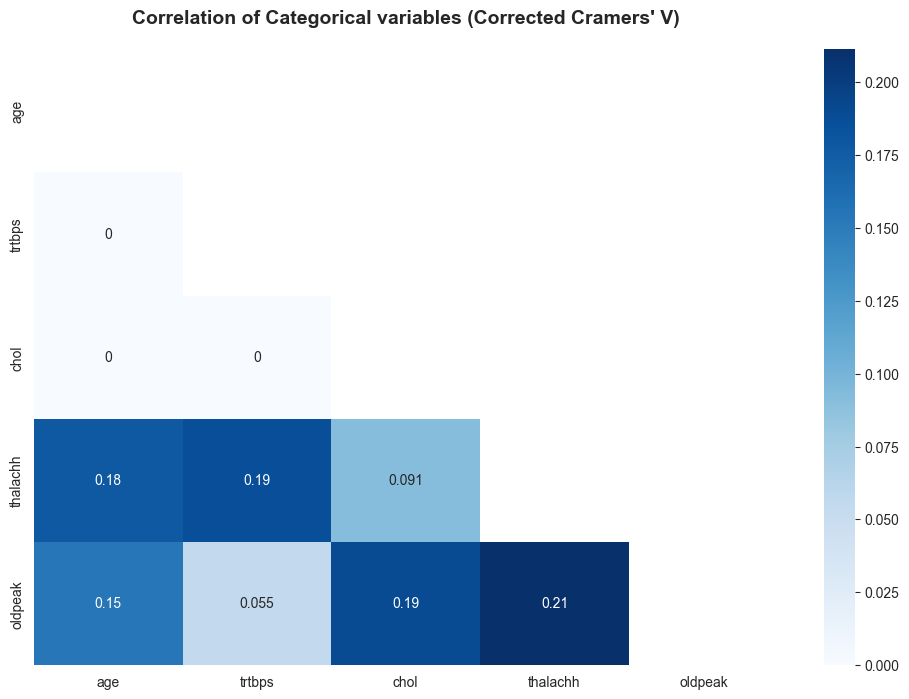

In [82]:
def cramers_corrected_stat(x, y):
    conf_matrix = pd.crosstab(x, y)
    correct = conf_matrix.shape[0] != 2
    chi2, p = ss.chi2_contingency(conf_matrix, correction=correct)[0:2]
    n = sum(conf_matrix.sum())
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    result = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return round(result, 6), round(p, 6)

for var in cat_cols:
    x = df[var]
    y = df['output']
    cramersV, p = cramers_corrected_stat(x, y)
    print(f'For variable {var}, Cramer\'s V: {cramersV} and p value: {p}')

sns.set_style('white')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

corr_matrix = df[con_cols].corr(method=lambda x, y: cramers_corrected_stat(x, y)[0])

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, mask=mask, ax=ax)
fig.text(0.5, 1.05, 'Correlation of Categorical variables (Corrected Cramers\' V)',
         horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold', transform=ax.transAxes)
sns.set_style('dark')

In [12]:
def plot_con(data,feature):
    fig, axes = plt.subplots(math.ceil(len(feature)/3), 3, figsize=(18, 16))
    background_color = "#ffe6e6"
    color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
    fig.patch.set_facecolor(background_color)

    for i, ax_row in enumerate(axes):
        for j, ax in enumerate(ax_row):
            index = i * 3 + j 
            ax.set_facecolor(background_color) 
            
            if index < len(con_cols):
                ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
                sns.boxenplot(ax=ax, y=data[feature[index]], palette=[color_palette[index]], width=0.6)
                ax.set_xlabel("")
                ax.set_ylabel("")
                ax.set_title(feature[index], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
            else:
                ax.axis("off") 
                
            for spine in ["top", "right", "left"]:
                ax.spines[spine].set_visible(False)

    plt.suptitle('Boxen plot for various continuous features', fontsize=20, fontweight='bold', fontfamily='serif', color="#000000")
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 


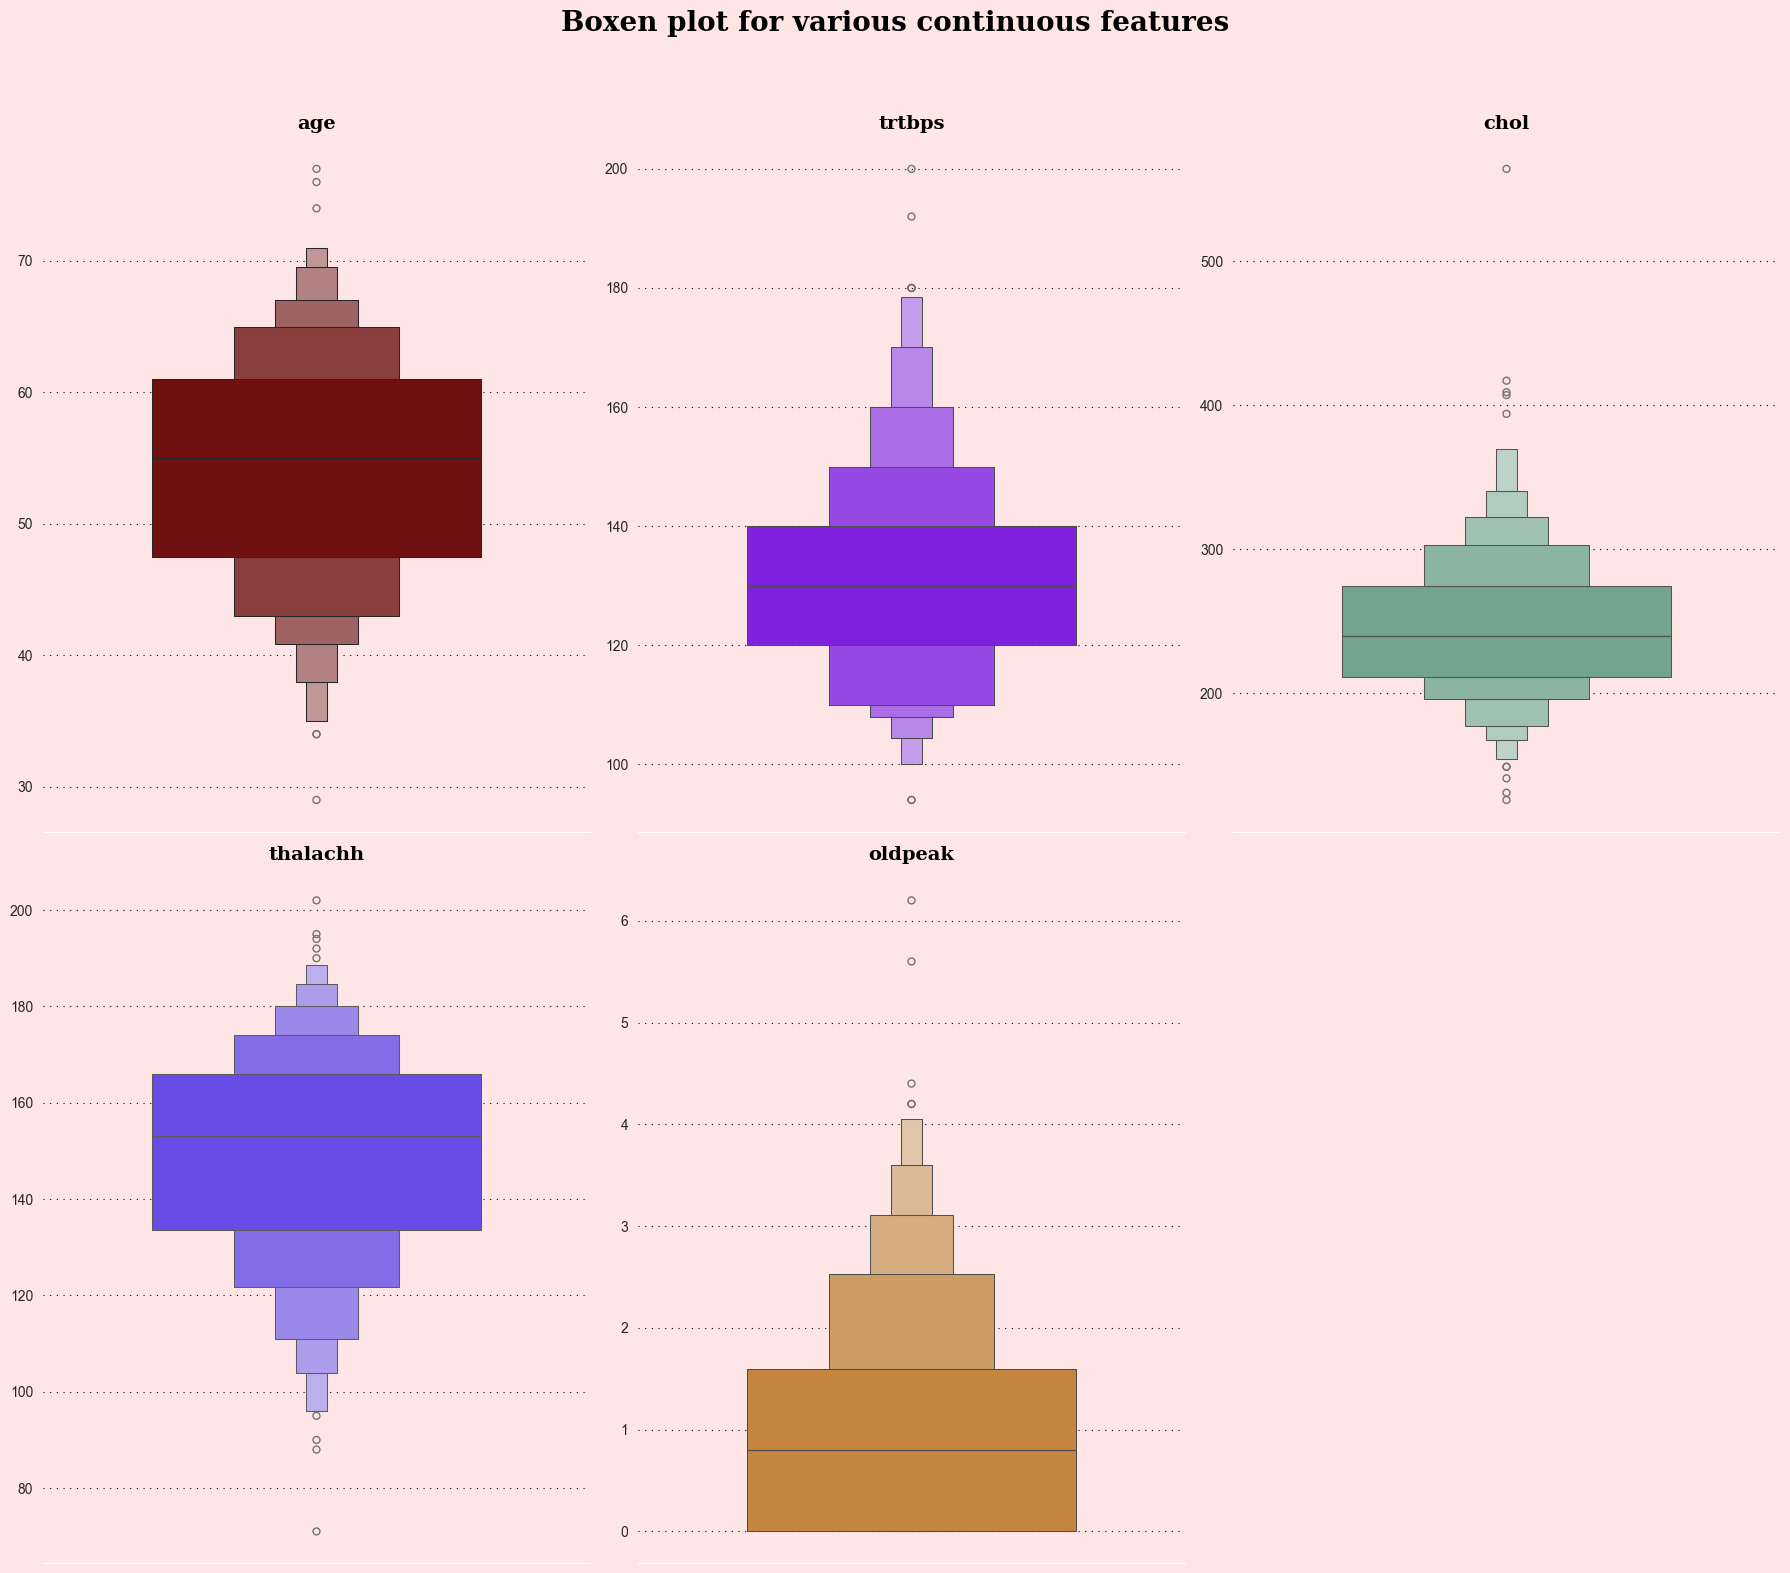

In [79]:
plot_con(df,con_cols)

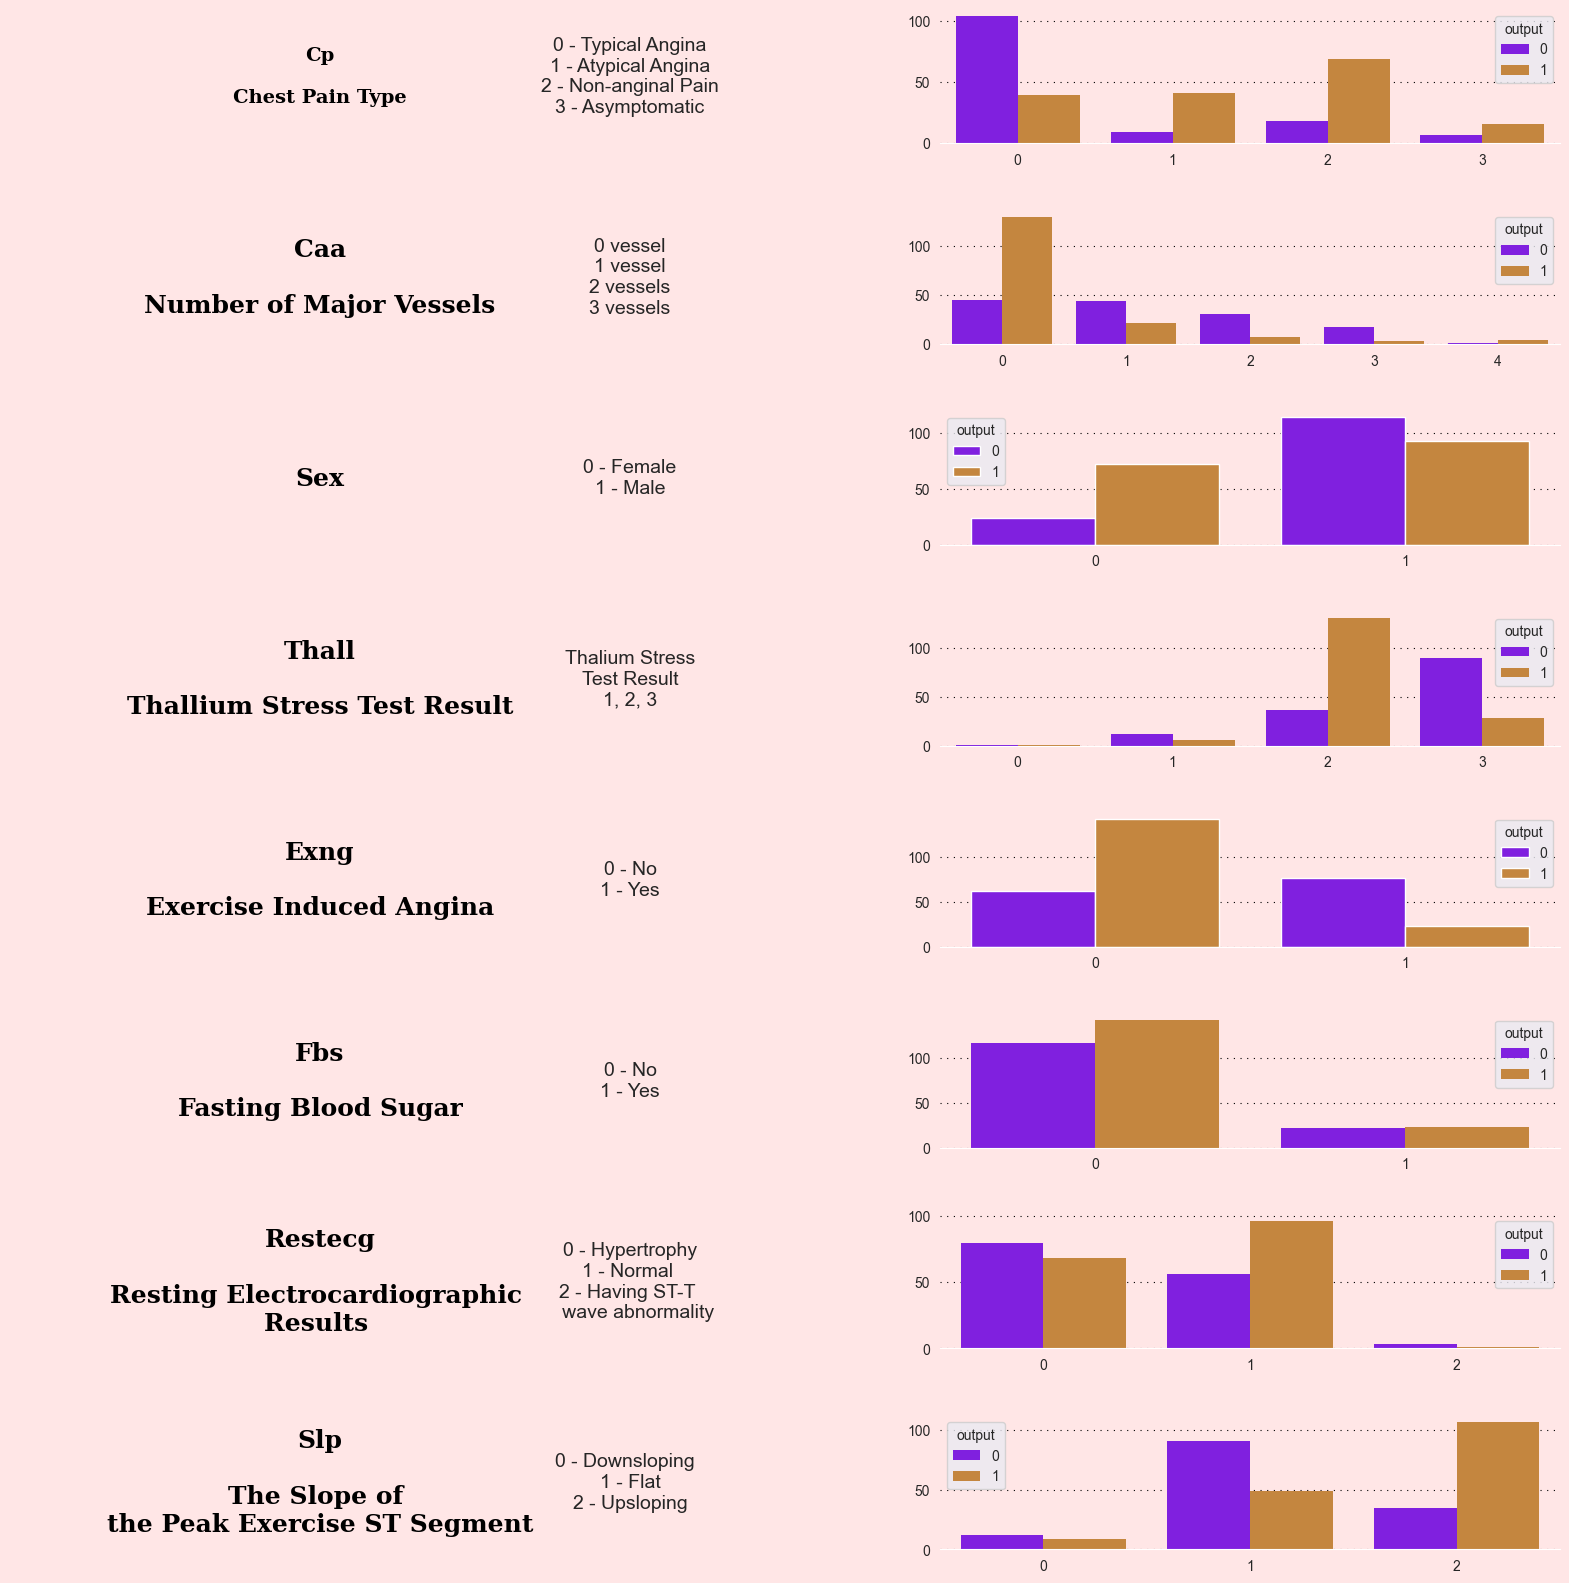

In [78]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])
ax14 = fig.add_subplot(gs[7,0])
ax15 = fig.add_subplot(gs[7,1])


background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 
ax12.set_facecolor(background_color) 
ax13.set_facecolor(background_color) 
ax14.set_facecolor(background_color) 
ax15.set_facecolor(background_color) 


# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Cp\n\nChest Pain Type",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"],linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Caa\n\nNumber of Major Vessels",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessel\n1 vessel\n2 vessels\n3 vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Sex",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Thall\n\nThallium Stress Test Result",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"],linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")


# Exng title
ax8.text(0.5,0.5,"Exng\n\nExercise Induced Angina",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Exng
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax9,data=df,x='exng',palette=["#8000ff","#da8829"], hue='output')
ax9.set_xlabel("")
ax9.set_ylabel("")

# Fbs title
ax10.text(0.5,0.5,"Fbs\n\nFasting Blood Sugar",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)

# Fbs
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax11, data=df, x='fbs',hue="output", fill=True,palette=["#8000ff","#da8829"],linewidth=0)
ax11.set_xlabel("")
ax11.set_ylabel("")



# Restecg title
ax12.text(0.5,0.5,"Restecg\n\nResting Electrocardiographic \nResults ",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax12.text(1,.5,"0 - Hypertrophy\n1 - Normal \n2 - Having ST-T \n   wave abnormality",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.tick_params(left=False, bottom=False)

# Restecg
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax13, data=df, x='restecg',hue="output", fill=True,palette=["#8000ff","#da8829"], linewidth=0)
ax13.set_xlabel("")
ax13.set_ylabel("")


# Slp title
ax14.text(.5,0.5,"Slp\n\nThe Slope of \nthe Peak Exercise ST Segment",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax14.text(1,.5,"0 - Downsloping  \n1 - Flat\n2 - Upsloping",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.tick_params(left=False, bottom=False)

# Slp
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax15, data=df, x='slp',hue="output", fill=True,palette=["#8000ff","#da8829"], linewidth=0)# 想要透敏度可以 alpha=.5,
ax15.set_xlabel("")
ax15.set_ylabel("")


#————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
for i in ["top","left","right"]:
        ax0.spines[i].set_visible(False)
        ax1.spines[i].set_visible(False)
        ax2.spines[i].set_visible(False)
        ax3.spines[i].set_visible(False)
        ax4.spines[i].set_visible(False)
        ax5.spines[i].set_visible(False)
        ax6.spines[i].set_visible(False)
        ax7.spines[i].set_visible(False)
        ax8.spines[i].set_visible(False)
        ax9.spines[i].set_visible(False)
        ax10.spines[i].set_visible(False)
        ax11.spines[i].set_visible(False)
        ax12.spines[i].set_visible(False)
        ax13.spines[i].set_visible(False)
        ax14.spines[i].set_visible(False)
        ax15.spines[i].set_visible(False)

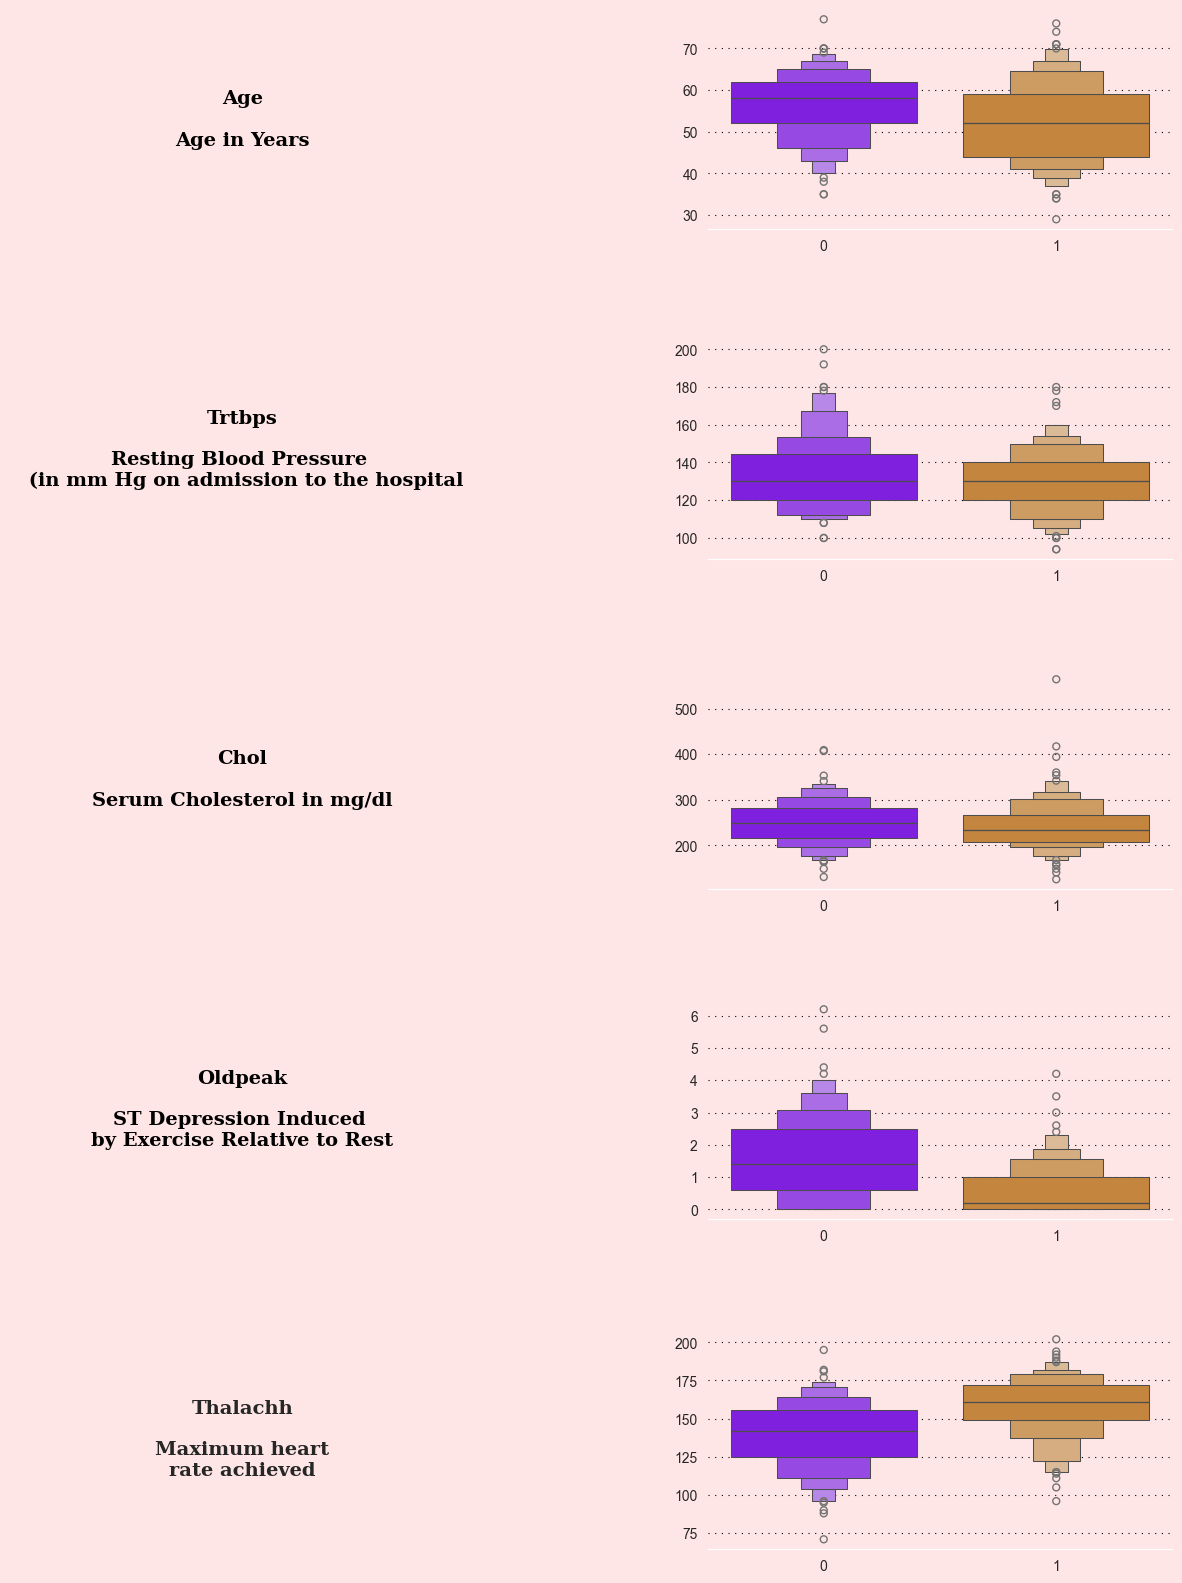

In [16]:
fig = plt.figure(figsize=(15,20))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])



background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 

# Age title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Age\n\nAge in Years",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)


# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1, data=df,x="output", y='age',palette=["#8000ff","#da8829"])
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps title
ax2.text(0.5,0.5,"Trtbps\n\nResting Blood Pressure \n (in mm Hg on admission to the hospital",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Trtbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3, data=df, x="output", y='trtbps',palette=["#8000ff","#da8829"])
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Chol\n\nSerum Cholesterol in mg/dl",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,data=df,x="output", y='chol',palette=["#8000ff","#da8829"])
ax5.set_xlabel("")
ax5.set_ylabel("")

# Oldpeak title
ax6.text(0.5,0.5,"Oldpeak\n\nST Depression Induced \nby Exercise Relative to Rest",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Oldpeak
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7, data=df, x="output", y='oldpeak',palette=["#8000ff","#da8829"])
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.text(.5, .5, "Thalachh\n\nMaximum heart\nrate achieved",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=14,
         fontweight='bold',
         fontfamily='serif')


ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
        ax0.spines[i].set_visible(False)
        ax1.spines[i].set_visible(False)
        ax2.spines[i].set_visible(False)
        ax3.spines[i].set_visible(False)
        ax4.spines[i].set_visible(False)
        ax5.spines[i].set_visible(False)
        ax6.spines[i].set_visible(False)
        ax7.spines[i].set_visible(False)
        ax8.spines[i].set_visible(False)
        ax9.spines[i].set_visible(False)

# **Preparing Model and Training**

In [17]:
models = []
models.append(('SVM',SVC()))
models.append(('Logistic', LogisticRegression()))
models.append(('Linear',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('BernoulliNB',BernoulliNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(('Adaboost', AdaBoostClassifier())) 

In [18]:
def model_acc(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
    AC = []
    MSE = []
    Pre = []
    Rec = []
    F1 = []
    model_score = np.zeros(len(models))

    for model_name, model in models:
        try:
            model = model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            if (model_name == 'Linear') | (model_name == 'RR') | (model_name == 'GBC') | (model_name == 'Ridge')| (model_name == 'LASSO'):
                accuracy = accuracy_score(y_test, np.round(abs(y_pred)), normalize=True) 
                precision, recall, f1, support = precision_recall_fscore_support(y_test, np.round(abs(y_pred)), average='binary')
            else:
                accuracy = accuracy_score(y_test, y_pred)
                precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

            mse = mean_squared_error(y_test, y_pred)
            
            mse,accuracy,precision, recall, f1 = round(mse, 4),round(accuracy, 4),round(precision, 4), round(recall, 4), round(f1, 4)

            AC.append(accuracy)
            Pre.append(precision)
            Rec.append(recall)
            F1.append(f1)

            MSE.append(mse)

            print(f'{model_name:<25}MSE: {mse:<20}Accuracy: {accuracy:<20}', end='\n\n')
        
        except Exception as e:
            print(f'Error occurred for {model_name}: {str(e)}',end='\n\n')
            continue 

    bm_acc = models[AC.index(max(AC))][0]
    best_acc = max(AC)
    
    bm_pre = Pre[AC.index(max(AC))]
    bm_rec = Rec[AC.index(max(AC))]
    bm_f1 = F1[AC.index(max(AC))]

    bm_mse = models[MSE.index(min(MSE))][0]
    best_mse = min(MSE)

    for i in range(len(models)):
        if AC[i] == best_acc:
            model_score[i]+=1

        if MSE[i] == best_mse:
            model_score[i] +=1
    
    if max(model_score) == 2:
        num = list(model_score).index(max(model_score))
        bm_acc = models[num][0]
        bm_mse = models[num][0]


    print(f'Hightest Accurary: {best_acc:<31}model: {bm_acc}')
    print(f'Lowest MSE: {best_mse:<38}model: {bm_mse}')
    print(f'Model Score: {model_score}')

    return bm_acc, best_acc, bm_mse, best_mse, AC, MSE, bm_pre, bm_rec, bm_f1

In [19]:
X,y = df.iloc[:,0:-1] , df.iloc[:,-1]

V0 = model_acc(X,y)

SVM                      MSE: 0.2951              Accuracy: 0.7049              

Logistic                 MSE: 0.0492              Accuracy: 0.9508              

Linear                   MSE: 0.0736              Accuracy: 0.918               

Ridge                    MSE: 0.0737              Accuracy: 0.918               

BernoulliNB              MSE: 0.1148              Accuracy: 0.8852              

LDA                      MSE: 0.082               Accuracy: 0.918               

KNN                      MSE: 0.2131              Accuracy: 0.7869              

DecisionTree             MSE: 0.1311              Accuracy: 0.8689              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.082               Accuracy: 0.918               

GradientBoosting         MSE: 0.1311              Accuracy: 0.8689              

XGBoost                  MSE: 0.1148              Accuracy: 0.8852              

Adaboost        

In [20]:
X1,y1 = df_New.iloc[:,0:-1] , df_New.iloc[:,-1]
V1 = model_acc(X1,y1)

SVM                      MSE: 0.2787              Accuracy: 0.7213              

Logistic                 MSE: 0.1475              Accuracy: 0.8525              

Linear                   MSE: 0.1131              Accuracy: 0.8361              

Ridge                    MSE: 0.1132              Accuracy: 0.8361              

BernoulliNB              MSE: 0.1311              Accuracy: 0.8689              

LDA                      MSE: 0.1639              Accuracy: 0.8361              

KNN                      MSE: 0.3115              Accuracy: 0.6885              

DecisionTree             MSE: 0.1803              Accuracy: 0.8197              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.1475              Accuracy: 0.8525              

GradientBoosting         MSE: 0.1803              Accuracy: 0.8197              

XGBoost                  MSE: 0.1803              Accuracy: 0.8197              

Adaboost        

In [21]:
X2,y2 = df.iloc[:,0:-1] , df.iloc[:,-1]

scaler = StandardScaler()
X2[con_cols] = scaler.fit_transform(X2[con_cols])

V2 = model_acc(X2,y2)

SVM                      MSE: 0.082               Accuracy: 0.918               

Logistic                 MSE: 0.082               Accuracy: 0.918               

Linear                   MSE: 0.0736              Accuracy: 0.918               

Ridge                    MSE: 0.0737              Accuracy: 0.918               

BernoulliNB              MSE: 0.082               Accuracy: 0.918               

LDA                      MSE: 0.082               Accuracy: 0.918               

KNN                      MSE: 0.0656              Accuracy: 0.9344              

DecisionTree             MSE: 0.1639              Accuracy: 0.8361              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.0656              Accuracy: 0.9344              

GradientBoosting         MSE: 0.1311              Accuracy: 0.8689              

XGBoost                  MSE: 0.1148              Accuracy: 0.8852              

Adaboost        

In [22]:
X3,y3 = df.iloc[:,0:-1] , df.iloc[:,-1]

encode_columns = cat_cols.copy()

X3 = pd.get_dummies(X3, columns=encode_columns)

V3 = model_acc(X3,y3)

SVM                      MSE: 0.3115              Accuracy: 0.6885              

Logistic                 MSE: 0.0328              Accuracy: 0.9672              

Linear                   MSE: 0.0655              Accuracy: 0.9836              

Ridge                    MSE: 0.0645              Accuracy: 0.9672              

BernoulliNB              MSE: 0.0984              Accuracy: 0.9016              

LDA                      MSE: 0.0164              Accuracy: 0.9836              

KNN                      MSE: 0.2295              Accuracy: 0.7705              

DecisionTree             MSE: 0.1148              Accuracy: 0.8852              

GaussianNB               MSE: 0.1148              Accuracy: 0.8852              

RandomForest             MSE: 0.082               Accuracy: 0.918               

GradientBoosting         MSE: 0.0984              Accuracy: 0.9016              

XGBoost                  MSE: 0.1148              Accuracy: 0.8852              

Adaboost        

In [23]:
X4,y4 = df.iloc[:,0:-1] , df.iloc[:,-1]

scaler = StandardScaler()
X4[con_cols] = scaler.fit_transform(X4[con_cols])

encode_columns = cat_cols.copy()

X4 = pd.get_dummies(X4, columns=encode_columns)

V4 = model_acc(X4,y4)

SVM                      MSE: 0.0984              Accuracy: 0.9016              

Logistic                 MSE: 0.0328              Accuracy: 0.9672              

Linear                   MSE: 0.0655              Accuracy: 0.9836              

Ridge                    MSE: 0.0645              Accuracy: 0.9672              

BernoulliNB              MSE: 0.0984              Accuracy: 0.9016              

LDA                      MSE: 0.0164              Accuracy: 0.9836              

KNN                      MSE: 0.1148              Accuracy: 0.8852              

DecisionTree             MSE: 0.1148              Accuracy: 0.8852              

GaussianNB               MSE: 0.2295              Accuracy: 0.7705              

RandomForest             MSE: 0.1148              Accuracy: 0.8852              

GradientBoosting         MSE: 0.0984              Accuracy: 0.9016              

XGBoost                  MSE: 0.1148              Accuracy: 0.8852              

Adaboost        

In [24]:
# https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/
# https://www.uptodate.com/contents/high-cholesterol-and-lipids-beyond-the-basics/print

df5 = df.copy()
X5,y5 = df5.iloc[:,0:-1] , df5.iloc[:,-1]

age_group = [
    (X5['age'] <= 45),
    (X5['age'] > 45) & (X5['age'] < 60),
    (X5['age'] >= 60)
]
g1 = ['young','middle-aged', 'older']
X5['age_group'] = np.select(age_group, g1)

trtbps_group = [
    (X5['trtbps'] <= 220),
    (X5['trtbps'] > 220) & (X5['trtbps'] < 240),
    (X5['trtbps'] >= 240)
]
g2 = ['low', 'ideal', 'high']
X5['trtbps_group'] = np.select(trtbps_group, g2)

chol_group = [
    (X5['chol'] <= 200),
    (X5['chol'] > 200) & (X5['chol'] < 240),
    (X5['chol'] >= 240)
]
g4 = ['normal','borderline high', 'high']
X5['chol_group'] = np.select(chol_group, g4)

thalachh_group = [
    (X5['thalachh'] < (220 - X5['age']) * 0.64),
    ((X5['thalachh'] >= (220 - X5['age']) * 0.64) & (X5['thalachh'] <= (220 - X5['age']) * 0.76)),
    ((X5['thalachh'] > (220 - X5['age']) * 0.76) & (X5['thalachh'] <= (220 - X5['age']) * 0.94)),
    (X5['thalachh'] > (220 - X5['age']) * 0.94)
]
g4 = ['low', 'moderate-intensity', 'vigorous-intensity', 'abnormal']
X5['thalachh_group'] = np.select(thalachh_group, g4)

# oldpeak_group = [(X5['oldpeak'] == 0), (X5['oldpeak'] > 0)]
# g5 = ['flat','up']
# X5['oldpeak_group'] = np.select(oldpeak_group, g5)

df5.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.60,2,0,2,1


In [25]:
print('Final No. of features: ', X5.shape[1])
X5.head(10)

Final No. of features:  17


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,age_group,trtbps_group,chol_group,thalachh_group
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,older,low,borderline high,abnormal
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,young,low,high,abnormal
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,young,low,borderline high,abnormal
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,middle-aged,low,borderline high,abnormal
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,middle-aged,low,high,abnormal
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,middle-aged,low,normal,vigorous-intensity
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,middle-aged,low,high,vigorous-intensity
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,young,low,high,abnormal
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,middle-aged,low,normal,abnormal
9,57,1,2,150,168,0,1,174,0,1.60,2,0,2,middle-aged,low,normal,abnormal


In [26]:
X5_col = X5.columns
X5_col = X5_col.difference(con_cols)
print(X5_col)

Index(['age_group', 'caa', 'chol_group', 'cp', 'exng', 'fbs', 'restecg', 'sex',
       'slp', 'thalachh_group', 'thall', 'trtbps_group'],
      dtype='object')


In [27]:
X5 = pd.get_dummies(X5, columns=X5_col)
X5.head(10)

,age,trtbps,chol,thalachh,oldpeak,age_group_middle-aged,age_group_older,age_group_young,caa_0,caa_1,...,slp_2,thalachh_group_abnormal,thalachh_group_low,thalachh_group_moderate-intensity,thalachh_group_vigorous-intensity,thall_0,thall_1,thall_2,thall_3,trtbps_group_low
0,63,145,233,150,2.30,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True
1,37,130,250,187,3.50,False,False,True,True,False,...,False,True,False,False,False,False,False,True,False,True
2,41,130,204,172,1.40,False,False,True,True,False,...,True,True,False,False,False,False,False,True,False,True
3,56,120,236,178,0.80,True,False,False,True,False,...,True,True,False,False,False,False,False,True,False,True
4,57,120,354,163,0.60,True,False,False,True,False,...,True,True,False,False,False,False,False,True,False,True
5,57,140,192,148,0.40,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,True
6,56,140,294,153,1.30,True,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
7,44,120,263,173,0.00,False,False,True,True,False,...,True,True,False,False,False,False,False,False,True,True
8,52,172,199,162,0.50,True,False,False,True,False,...,True,True,False,False,False,False,False,False,True,True
9,57,150,168,174,1.60,True,False,False,True,False,...,True,True,False,False,False,False,False,True,False,True


In [76]:
V5 = model_acc(X5,y5)

SVM                      MSE: 0.3115              Accuracy: 0.6885              

Logistic                 MSE: 0.0328              Accuracy: 0.9672              

Linear                   MSE: 0.0695              Accuracy: 0.9672              

Ridge                    MSE: 0.0677              Accuracy: 0.9672              

BernoulliNB              MSE: 0.0656              Accuracy: 0.9344              

LDA                      MSE: 0.0328              Accuracy: 0.9672              

KNN                      MSE: 0.2295              Accuracy: 0.7705              

DecisionTree             MSE: 0.1475              Accuracy: 0.8525              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.1148              Accuracy: 0.8852              

GradientBoosting         MSE: 0.0984              Accuracy: 0.9016              

XGBoost                  MSE: 0.1148              Accuracy: 0.8852              

Adaboost        

In [31]:
def check_acc(X,y,model,size,rs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=rs)
    model_new = model.fit(X_train, y_train)
    y_pred = model_new.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    return mse,acc

## PCA

In [88]:
pca_new = PCA(n_components=dim)
pca_new.fit(X3)
transformed_features = pca_new.transform(X3)
X6 = pd.DataFrame(data=transformed_features) 
y6 = y3.copy()

In [32]:
def PCA_M(X,y,model,size,rs):
    Range_L = range(1,len(X.columns)+1)
    Acc_L = []

    for i in Range_L:
        pca_new = PCA(n_components=i)
        pca_new.fit(X)
        transformed_features = pca_new.transform(X)
        df_transformed = pd.DataFrame(data=transformed_features) 

        acc_New = check_acc(df_transformed,y,model,size,rs)[1]
        Acc_L.append(acc_New)

    plt.plot(Range_L,Acc_L)
    plt.xlabel('Dimension')
    plt.ylabel('Accuracy')
    plt.title('Principal Components Analysis')
    plt.gca().set_facecolor('white')
    plt.show()

    dim = Acc_L.index(max(Acc_L))+1
    print(f'max(Acc_L): {max(Acc_L)}\tAcc_L.index(max(Acc_L))+1: {dim}')
    return dim

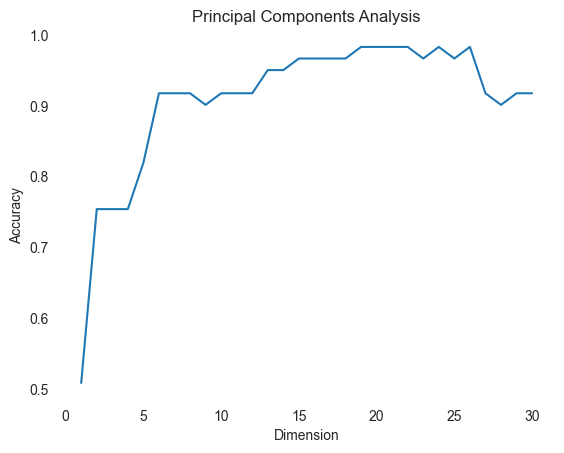

max(Acc_L): 0.9836065573770492	Acc_L.index(max(Acc_L))+1: 19


In [33]:
dim = PCA_M(X3,y3,LinearDiscriminantAnalysis(),0.2,65)

# **Comparison**

In [89]:
V6 = model_acc(X6,y6)

SVM                      MSE: 0.2623              Accuracy: 0.7377              

Logistic                 MSE: 0.0328              Accuracy: 0.9672              

Linear                   MSE: 0.0624              Accuracy: 0.9836              

Ridge                    MSE: 0.0624              Accuracy: 0.9836              

BernoulliNB              MSE: 0.1803              Accuracy: 0.8197              

LDA                      MSE: 0.0164              Accuracy: 0.9836              

KNN                      MSE: 0.2295              Accuracy: 0.7705              

DecisionTree             MSE: 0.2787              Accuracy: 0.7213              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.1311              Accuracy: 0.8689              

GradientBoosting         MSE: 0.1311              Accuracy: 0.8689              

XGBoost                  MSE: 0.0656              Accuracy: 0.9344              

Adaboost        

In [92]:
bm_acc_l = []
bm_mse_l = []
acc_l = []
mse_l = []
pre_l = []
rec_l = []
f1_l = []
V = [V0,V1,V2,V3,V4,V5,V6]

for i in range(7):
    V_bm_acc, V_best_acc, V_bm_mse, V_best_mse, V_AC, V_MSE,V_Pre, V_Rec, V_F1 = V[i]
    bm_acc_l.append(V_bm_acc)
    bm_mse_l.append(V_bm_mse)
    acc_l.append(V_best_acc)
    mse_l.append(V_best_mse)
    pre_l.append(V_Pre)
    rec_l.append(V_Rec)
    f1_l.append(V_F1)

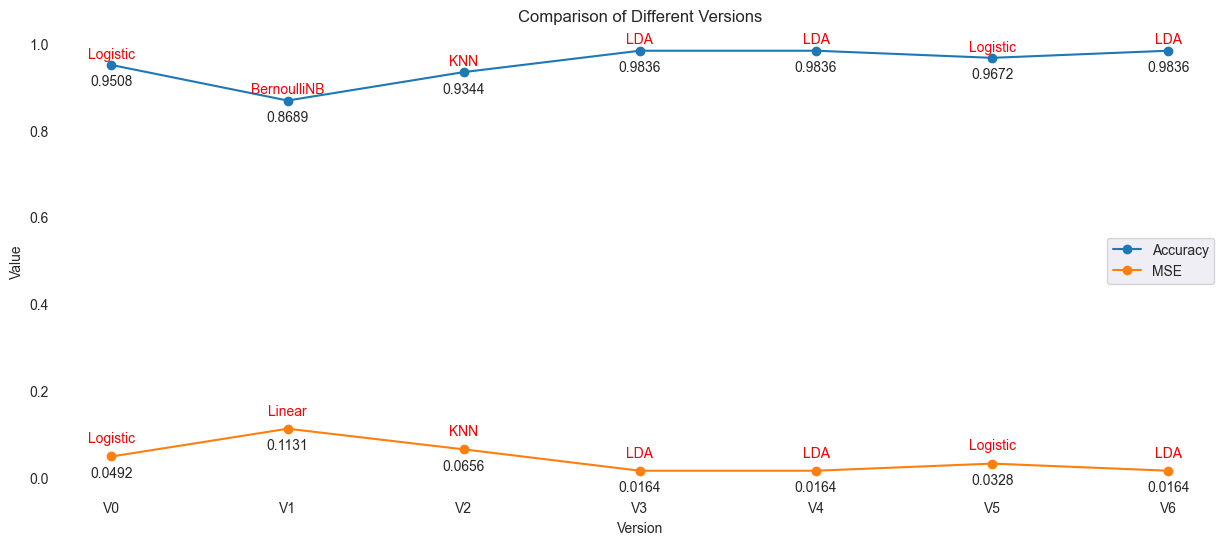

In [93]:
Version = ['V0','V1', 'V2', 'V3', 'V4','V5', 'V6']

plt.figure(figsize=(15, 6))

plt.plot(Version, acc_l, marker='o', label='acc_l')
plt.plot(Version, mse_l, marker='o', label='mse_l')

for i in range(len(Version)):
    # acc_str = '{:.4f}'.format(acc_l[i])
    # mse_str = '{:.4f}'.format(mse_l[i])
    acc_str = acc_l[i]
    mse_str = mse_l[i]
    plt.annotate(acc_str, (Version[i], acc_l[i]), textcoords="offset points", xytext=(0,-15), ha='center')
    plt.annotate(mse_str, (Version[i], mse_l[i]), textcoords="offset points", xytext=(0,-15), ha='center')
    
for i in range(len(Version)):
    bm_acc_str = bm_acc_l[i]
    bm_mse_str = bm_mse_l[i]
    plt.annotate(bm_acc_str, (Version[i], acc_l[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')
    plt.annotate(bm_mse_str, (Version[i], mse_l[i]), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.title('Comparison of Different Versions')
plt.xlabel('Version')
plt.ylabel('Value')
plt.legend(['Accuracy','MSE'],loc='center right', bbox_to_anchor=(1, 0.5))
plt.gca().set_facecolor('white')
plt.show()

# **Other Methods**

## Hyperparameter Tuning

In [43]:
n_features = X6.shape[1]
n_classes = len(np.unique(y6))

param_grid = {
    'n_components': range(1, min(n_features, n_classes - 1) + 1),
    'tol': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]  
}

lda_model = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator=lda_model, param_grid=param_grid, scoring='accuracy', cv=5)

X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=65)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test Accuracy:", acc)

Best Params: {'n_components': 1, 'tol': 0.1}
Best Accuracy: 0.8306122448979592
Test MSE: 0.01639344262295082
Test Accuracy: 0.9836065573770492


# **New Data Cleaning**

In [44]:
def dc_outlier(data,feature):

    records = data.shape[0]

    for i in range(len(feature)):
        q1 = df[feature[i]].quantile(0.25)
        q3 = df[feature[i]].quantile(0.75)
        iq_range = q3 - q1
        up_limit = q3 + 1.5 * iq_range
        low_limit = q1 - 1.5 * iq_range

        for j in range(records):
            if data[feature[i]][j] < q1:
                data[feature[i]][j] = low_limit
            elif data[feature[i]][j] > q3:
                data[feature[i]][j] = up_limit
            else: continue
    return data

In [45]:
df7 = df.copy()
X7,y7 = df7.iloc[:,0:-1] , df7.iloc[:,-1]
X7 = dc_outlier(X7,con_cols)

In [46]:
X.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.00,303.00,303.00,303.00,303.00
mean,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.80,-2.15,-2.32,-3.44,-0.90
25%,-0.76,-0.66,-0.68,-0.71,-0.90
50%,0.07,-0.09,-0.12,0.15,-0.21
75%,0.73,0.48,0.55,0.72,0.48
max,2.50,3.91,6.14,2.29,4.45


In [47]:
X7.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.28,0.68,0.97,130.56,242.83,0.15,0.53,150.88,0.33,1.35,1.40,0.73,2.31
std,19.03,0.47,1.03,26.30,90.45,0.36,0.53,46.38,0.47,1.58,0.62,1.02,0.61
min,27.25,0.00,0.00,90.00,115.75,0.00,0.00,84.75,0.00,0.00,0.00,0.00,0.00
25%,37.62,0.00,0.00,120.00,211.00,0.00,0.00,109.38,0.00,0.00,1.00,0.00,2.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00
75%,61.00,1.00,2.00,140.00,321.88,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00
max,81.25,1.00,3.00,170.00,369.75,1.00,2.00,214.75,1.00,4.00,2.00,4.00,3.00


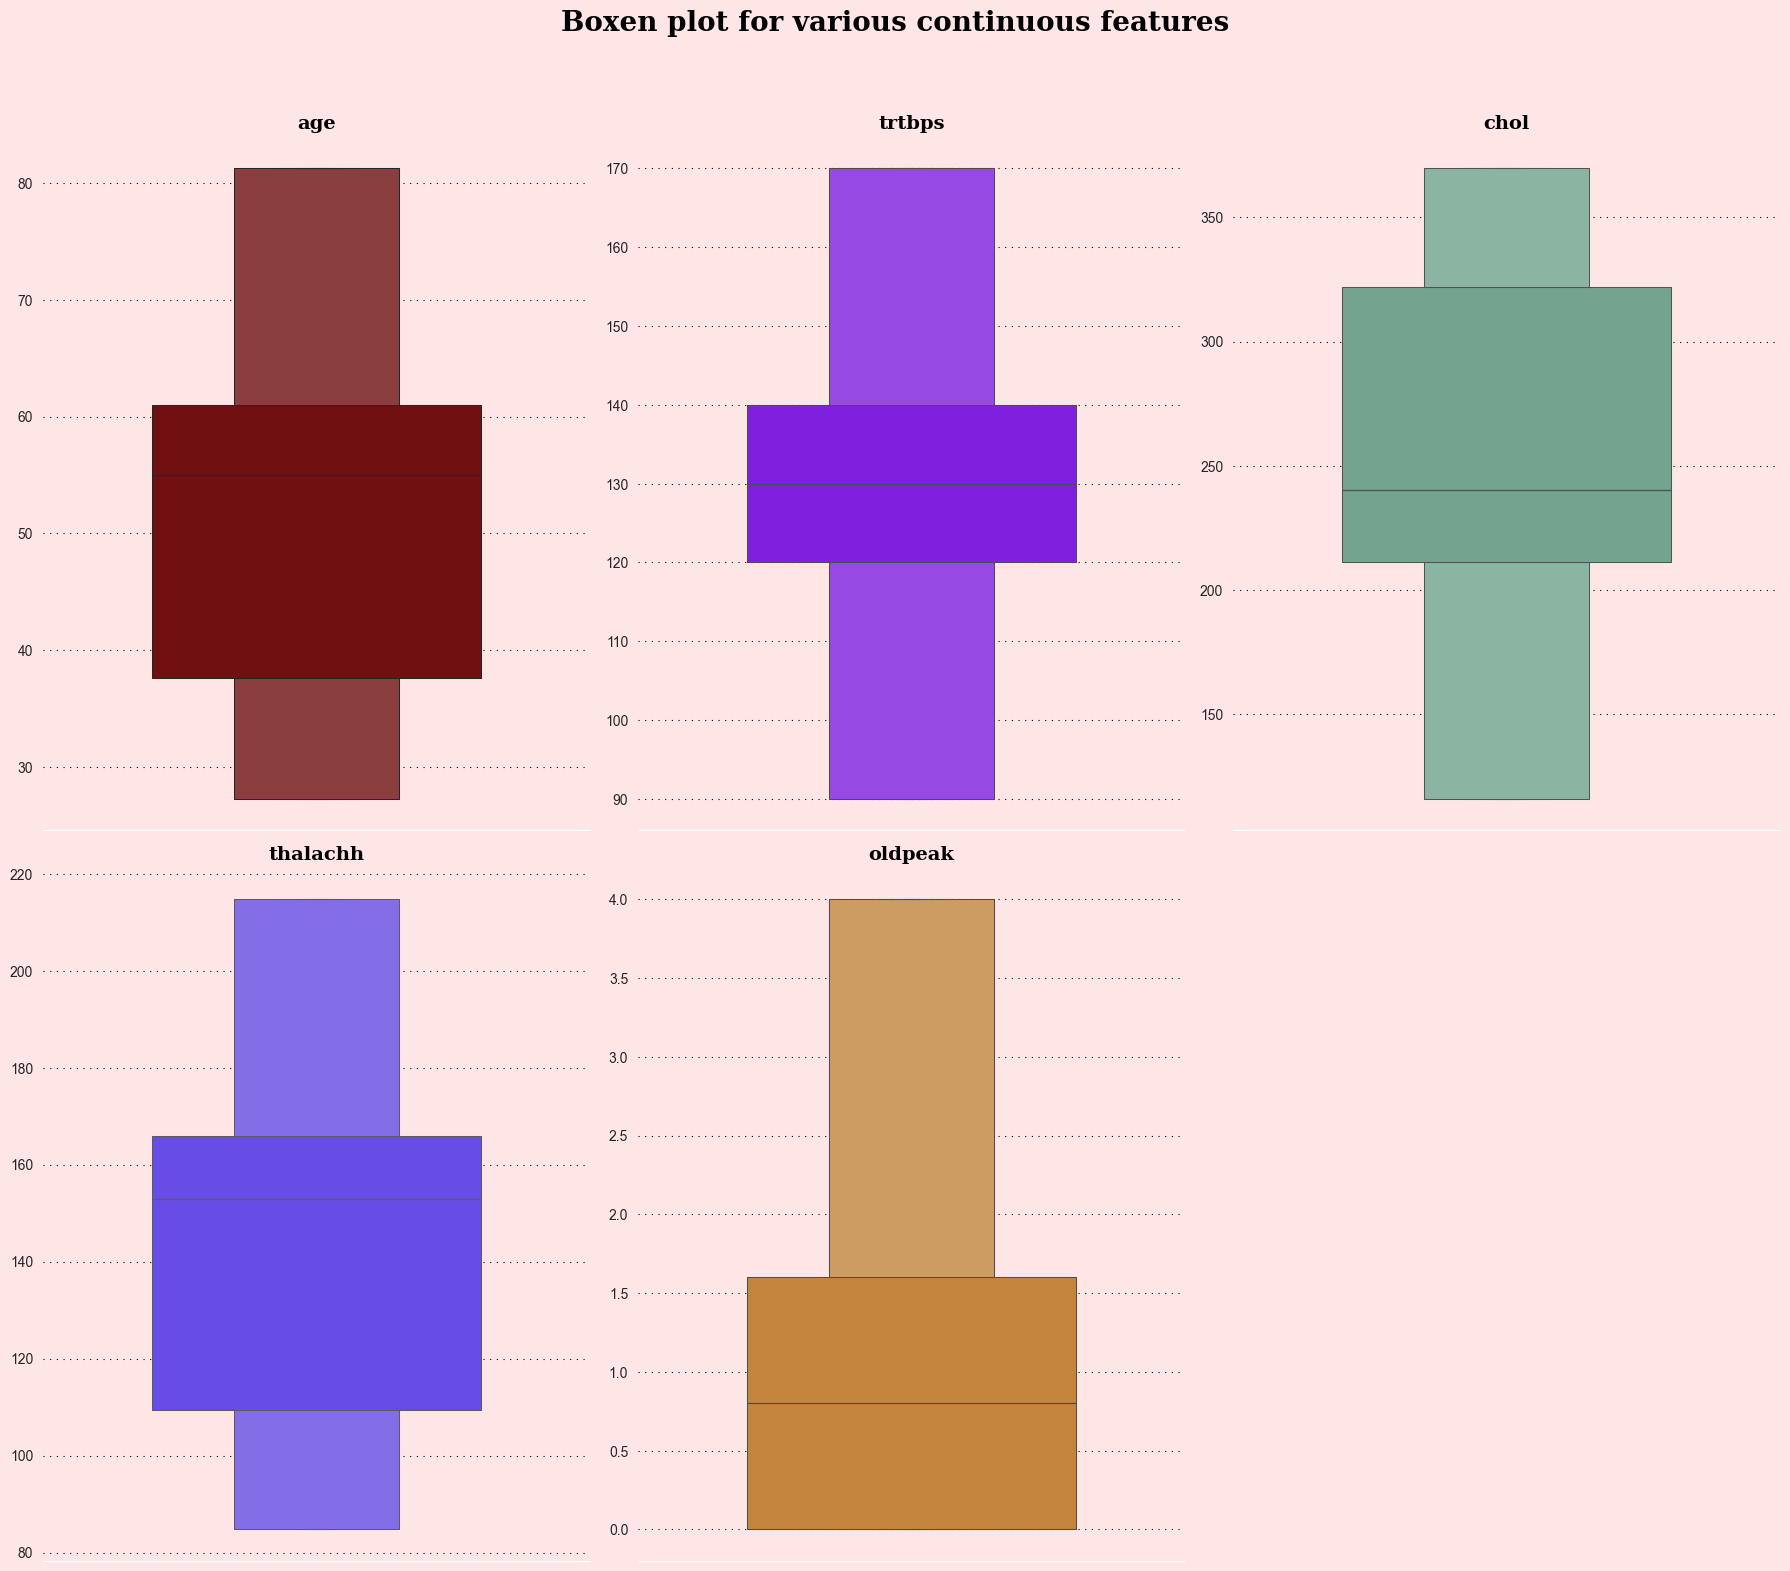

In [48]:
plot_con(X7,con_cols)

In [49]:
V7 = model_acc(X7,y7)

SVM                      MSE: 0.2295              Accuracy: 0.7705              

Logistic                 MSE: 0.082               Accuracy: 0.918               

Linear                   MSE: 0.0731              Accuracy: 0.9344              

Ridge                    MSE: 0.0732              Accuracy: 0.9344              

BernoulliNB              MSE: 0.1148              Accuracy: 0.8852              

LDA                      MSE: 0.0656              Accuracy: 0.9344              

KNN                      MSE: 0.1967              Accuracy: 0.8033              

DecisionTree             MSE: 0.1967              Accuracy: 0.8033              

GaussianNB               MSE: 0.1148              Accuracy: 0.8852              

RandomForest             MSE: 0.0984              Accuracy: 0.9016              

GradientBoosting         MSE: 0.1311              Accuracy: 0.8689              

XGBoost                  MSE: 0.1148              Accuracy: 0.8852              

Adaboost        

In [52]:
df8 = df.copy()
df8.drop_duplicates(keep='first', inplace=True)
print(f'df8.shape): {df8.shape}')

df8.loc[df8['caa'] == 4, 'caa'] = np.nan
df8.loc[df8['thall'] == 0, 'thall'] = np.nan

df8.shape): (302, 14)


In [56]:
def mode_m(data,feature,target):
    for i in range(len(feature)):
        if data[feature[i]].isnull().any():
            mode_by_output = data.groupby(target)[feature[i]].apply(lambda x: x.mode())

            data[feature[i]].fillna(data[target].map(lambda x: mode_by_output[x].iloc[0] if x in mode_by_output.index else None), inplace=True)
    return data

In [54]:
# df8['caa'].isnull().value_counts()
# df8[df8["caa"]==np.nan].groupby(df['output']).value_counts()
# df8[['caa', 'thall']].describe()
# import statistics
# df["caa"] = df["caa"].replace(np.NaN, statistics.mode(df["caa"]))
# df8.isnull().sum().sort_values(ascending=False)
# df8.loc[df8['caa'].isnull(), ['output', 'caa']]

In [59]:
df8 = mode_m(df8,['caa','thall'],'output')
X8,y8 = df8.iloc[:,0:-1] , df8.iloc[:,-1]
V8 = model_acc(X8,y8)

SVM                      MSE: 0.2787              Accuracy: 0.7213              

Logistic                 MSE: 0.1311              Accuracy: 0.8689              

Linear                   MSE: 0.1127              Accuracy: 0.8361              

Ridge                    MSE: 0.1129              Accuracy: 0.8361              

BernoulliNB              MSE: 0.1311              Accuracy: 0.8689              

LDA                      MSE: 0.1639              Accuracy: 0.8361              

KNN                      MSE: 0.3115              Accuracy: 0.6885              

DecisionTree             MSE: 0.1967              Accuracy: 0.8033              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.1475              Accuracy: 0.8525              

GradientBoosting         MSE: 0.1639              Accuracy: 0.8361              

XGBoost                  MSE: 0.1803              Accuracy: 0.8197              

Adaboost        

In [61]:
df9 = df.copy()
df9.drop_duplicates(keep='first', inplace=True)
print(f'df9.shape): {df9.shape}')

df9.loc[df9['caa'] == 4, 'caa'] = np.nan
df9.loc[df9['thall'] == 0, 'thall'] = np.nan

missing_values = df9[['caa', 'thall']].isnull()

X = df9.drop(['caa', 'thall'], axis=1)
y_caa = df9['caa']
y_thall = df9['thall']

rf_caa = RandomForestRegressor(n_estimators=100, random_state=42)
rf_caa.fit(X[~missing_values['caa']], y_caa[~missing_values['caa']])

predicted_caa = rf_caa.predict(X[missing_values['caa']])

df9.loc[missing_values['caa'], 'caa'] = predicted_caa

rf_thall = RandomForestRegressor(n_estimators=100, random_state=42)
rf_thall.fit(X[~missing_values['thall']], y_thall[~missing_values['thall']])

predicted_thall = rf_thall.predict(X[missing_values['thall']])

df9.loc[missing_values['thall'], 'thall'] = predicted_thall

print(df9[['caa', 'thall']].describe())

df9.shape): (302, 14)
         caa  thall
count 302.00 302.00
mean    0.67   2.33
std     0.93   0.58
min     0.00   1.00
25%     0.00   2.00
50%     0.00   2.00
75%     1.00   3.00
max     3.00   3.00


In [62]:
X9,y9 = df9.iloc[:,0:-1] , df9.iloc[:,-1]
V9 = model_acc(X9,y9)

SVM                      MSE: 0.2787              Accuracy: 0.7213              

Logistic                 MSE: 0.1311              Accuracy: 0.8689              

Linear                   MSE: 0.1127              Accuracy: 0.8361              

Ridge                    MSE: 0.1129              Accuracy: 0.8361              

BernoulliNB              MSE: 0.1311              Accuracy: 0.8689              

LDA                      MSE: 0.1639              Accuracy: 0.8361              

KNN                      MSE: 0.3115              Accuracy: 0.6885              

DecisionTree             MSE: 0.2295              Accuracy: 0.7705              

GaussianNB               MSE: 0.1311              Accuracy: 0.8689              

RandomForest             MSE: 0.1475              Accuracy: 0.8525              

GradientBoosting         MSE: 0.1639              Accuracy: 0.8361              

XGBoost                  MSE: 0.1967              Accuracy: 0.8033              

Adaboost        

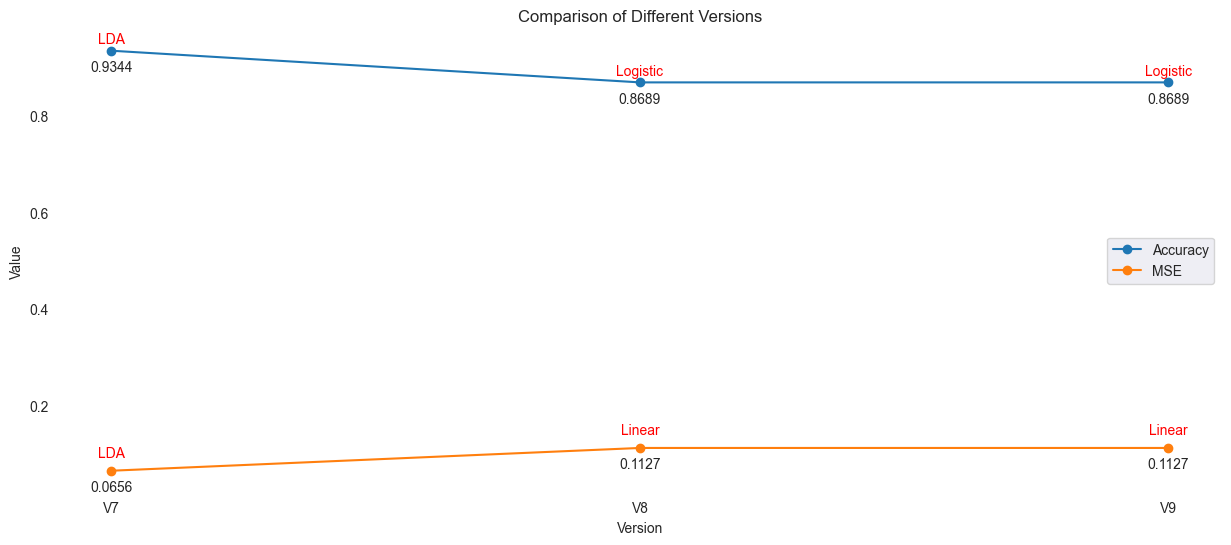

In [94]:
bm_acc_l = []
bm_mse_l = []
acc_l = []
mse_l = []
pre_l = []
rec_l = []
f1_l = []
V = [V7,V8,V9]

for i in range(3):
    V_bm_acc, V_best_acc, V_bm_mse, V_best_mse, V_AC, V_MSE,V_Pre, V_Rec, V_F1 = V[i]
    bm_acc_l.append(V_bm_acc)
    bm_mse_l.append(V_bm_mse)
    acc_l.append(V_best_acc)
    mse_l.append(V_best_mse)
    pre_l.append(V_Pre)
    rec_l.append(V_Rec)
    f1_l.append(V_F1)
    
Version = ['V7', 'V8', 'V9']

plt.figure(figsize=(15, 6))

plt.plot(Version, acc_l, marker='o', label='acc_l')
plt.plot(Version, mse_l, marker='o', label='mse_l')

for i in range(len(Version)):
    # acc_str = '{:.4f}'.format(acc_l[i])
    # mse_str = '{:.4f}'.format(mse_l[i])
    acc_str = acc_l[i]
    mse_str = mse_l[i]
    plt.annotate(acc_str, (Version[i], acc_l[i]), textcoords="offset points", xytext=(0,-15), ha='center')
    plt.annotate(mse_str, (Version[i], mse_l[i]), textcoords="offset points", xytext=(0,-15), ha='center')
    
for i in range(len(Version)):
    bm_acc_str = bm_acc_l[i]
    bm_mse_str = bm_mse_l[i]
    plt.annotate(bm_acc_str, (Version[i], acc_l[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')
    plt.annotate(bm_mse_str, (Version[i], mse_l[i]), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.title('Comparison of Different Versions')
plt.xlabel('Version')
plt.ylabel('Value')
plt.legend(['Accuracy','MSE'],loc='center right', bbox_to_anchor=(1, 0.5))
plt.gca().set_facecolor('white')
plt.show()

# **Hypothesis**

In [65]:
data_subset = df[['age', 'output']]

correlation_coefficient, p_value = pearsonr(data_subset['age'], data_subset['output'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: -0.22543871587483727
P-value: 7.52480130344234e-05
Reject the null hypothesis: There is a significant correlation.


In [66]:
data_subset = df[['sex', 'output']]

contingency_table = pd.crosstab(data_subset['sex'], data_subset['output'])

stat, p_value = proportions_ztest(contingency_table.iloc[:, 1], contingency_table.sum(axis=1))

print("Z-statistic:", stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is significant difference in the probability of having heart disease between males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the probability of having heart disease between males and females.")

Z-statistic: 4.890233523540772
P-value: 1.0071642033238824e-06
Reject the null hypothesis: There is significant difference in the probability of having heart disease between males and females.


In [125]:
df_binary = df.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(df_binary, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
rules[selected_columns]

rules.head(10)

/Users/edith/opt/anaconda3/envs/Jupyter Notebook/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(sex),(age),0.68,1.00,0.68,1.00,1.00,0.00,inf,0.00
1,(cp),(age),0.53,1.00,0.53,1.00,1.00,0.00,inf,0.00
2,(trtbps),(age),1.00,1.00,1.00,1.00,1.00,0.00,inf,0.00
3,(age),(trtbps),1.00,1.00,1.00,1.00,1.00,0.00,inf,0.00
4,(chol),(age),1.00,1.00,1.00,1.00,1.00,0.00,inf,0.00
5,(age),(chol),1.00,1.00,1.00,1.00,1.00,0.00,inf,0.00
6,(fbs),(age),0.15,1.00,0.15,1.00,1.00,0.00,inf,0.00
7,(restecg),(age),0.51,1.00,0.51,1.00,1.00,0.00,inf,0.00
8,(thalachh),(age),1.00,1.00,1.00,1.00,1.00,0.00,inf,0.00
9,(age),(thalachh),1.00,1.00,1.00,1.00,1.00,0.00,inf,0.00


In [142]:
cat = X5.columns.difference(con_cols)
cat

Index(['age_group_middle-aged', 'age_group_older', 'age_group_young', 'caa_0',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'chol_group_borderline high',
       'chol_group_high', 'chol_group_normal', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'exng_0', 'exng_1', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'sex_0', 'sex_1', 'slp_0', 'slp_1', 'slp_2',
       'thalachh_group_abnormal', 'thalachh_group_low',
       'thalachh_group_moderate-intensity',
       'thalachh_group_vigorous-intensity', 'thall_0', 'thall_1', 'thall_2',
       'thall_3', 'trtbps_group_low'],
      dtype='object')

In [144]:
df_New2 = pd.concat([X5[cat], y], axis=1)
df_New2.columns

Index(['age_group_middle-aged', 'age_group_older', 'age_group_young', 'caa_0',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'chol_group_borderline high',
       'chol_group_high', 'chol_group_normal', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'exng_0', 'exng_1', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'sex_0', 'sex_1', 'slp_0', 'slp_1', 'slp_2',
       'thalachh_group_abnormal', 'thalachh_group_low',
       'thalachh_group_moderate-intensity',
       'thalachh_group_vigorous-intensity', 'thall_0', 'thall_1', 'thall_2',
       'thall_3', 'trtbps_group_low', 'output'],
      dtype='object')

In [156]:
df_encoded = pd.get_dummies(df_New2)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
result = rules[selected_columns]

result = result.sort_values(by=['support', 'confidence'], ascending=False)

result.head(10)

,antecedents,consequents,support,confidence,lift
70,(fbs_0),(trtbps_group_low),0.85,1.00,1.00
69,(trtbps_group_low),(fbs_0),0.85,0.85,1.00
81,(sex_1),(trtbps_group_low),0.68,1.00,1.00
53,(exng_0),(trtbps_group_low),0.67,1.00,1.00
15,(caa_0),(trtbps_group_low),0.58,1.00,1.00
668,"(exng_0, fbs_0)",(trtbps_group_low),0.58,1.00,1.00
47,(exng_0),(fbs_0),0.58,0.86,1.01
667,"(exng_0, trtbps_group_low)",(fbs_0),0.58,0.86,1.01
669,(exng_0),"(trtbps_group_low, fbs_0)",0.58,0.86,1.01
806,"(sex_1, fbs_0)",(trtbps_group_low),0.57,1.00,1.00


In [157]:
df_encoded = pd.get_dummies(df_New2)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules_with_output = rules[rules['consequents'] == {'output'}]

selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
result = rules_with_output[selected_columns]

result = result.sort_values(by='confidence', ascending=False)

result.head(10)

,antecedents,consequents,support,confidence,lift
8292,"(caa_0, age_group_young, trtbps_group_low, exn...",(output),0.11,1.00,1.84
6737,"(trtbps_group_low, cp_2, thall_2, sex_0)",(output),0.10,1.00,1.84
10095,"(fbs_0, restecg_1, sex_0, exng_0, thall_2)",(output),0.12,1.00,1.84
4386,"(caa_0, exng_0, thall_2, age_group_young)",(output),0.11,1.00,1.84
2919,"(cp_2, thall_2, sex_0)",(output),0.10,1.00,1.84
1431,"(caa_0, thall_2, age_group_young)",(output),0.12,1.00,1.84
4439,"(caa_0, thall_2, fbs_0, age_group_young)",(output),0.12,1.00,1.84
11019,"(caa_0, fbs_0, age_group_young, trtbps_group_l...",(output),0.11,1.00,1.84
8314,"(caa_0, fbs_0, age_group_young, trtbps_group_l...",(output),0.12,1.00,1.84
8245,"(caa_0, fbs_0, age_group_young, exng_0, thall_2)",(output),0.11,1.00,1.84
